## Deliverable 3: Optimize the Model (Attempts)
###   Preprocessing the Data for a Neural Network

In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy import stats
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Check the data types
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
apptype_count = application_df.APPLICATION_TYPE.value_counts()
apptype_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

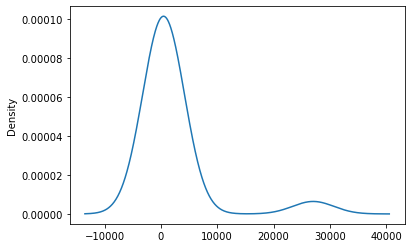

In [7]:
# Visualize the value counts of APPLICATION_TYPE with a density() plot
apptype_plt = apptype_count.plot.density()
apptype_plt

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(apptype_count[apptype_count < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2150        1
C2500        1
C5200        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

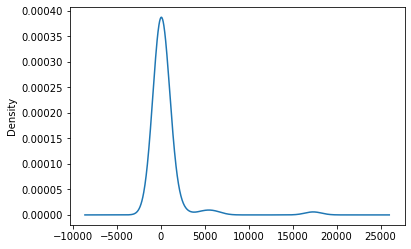

In [10]:
# Visualize the value counts of CLASSIFICATION, with density()
class_plt = class_count.plot.density()
class_plt

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [12]:
# Remove columns: ... 
# application_df = application_df.drop(columns=["CLASSIFICATION"])
# application_df

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Attempting to reduce noisy variables

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64


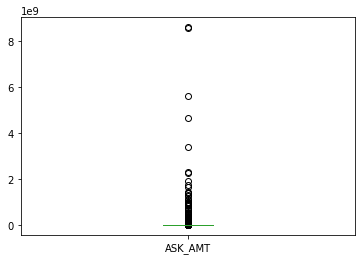

In [16]:
# looking at ASK_AMT
print(application_df.ASK_AMT.describe())
application_df.ASK_AMT.plot.box()

In [17]:
# Reduce/filter out outliers noisy variables from features ASK_AMT, using IQR and zscore 
application_df = application_df[(np.abs(stats.zscore(application_df.ASK_AMT)) <= 3)]
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Removing other low-impact features
application_df = application_df.drop(columns = ['STATUS','SPECIAL_CONSIDERATIONS_Y', 'SPECIAL_CONSIDERATIONS_N'])
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
#  Remove IS_SUCCESSFUL target from features data
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns="IS_SUCCESSFUL").values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model
### Attempt-1: To achieve a target predictive Model Accuracy > 75%

In [21]:
# Define the model - deep neural net. the number of input features and the hidden nodes for each layer.
# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in 
# the hidden layer as the number of inputs.
# And, even the most complex interactions can be characterized by as few as three hidden layers.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                3510      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
803/803 [==============================] - 1s 893us/step - loss: 0.5734 - accuracy: 0.7186
Epoch 2/50
803/803 [==============================] - 1s 857us/step - loss: 0.5581 - accuracy: 0.7273
Epoch 3/50
803/803 [==============================] - 1s 979us/step - loss: 0.5547 - accuracy: 0.7296
Epoch 4/50
803/803 [==============================] - 1s 858us/step - loss: 0.5536 - accuracy: 0.7301
Epoch 5/50
803/803 [==============================] - 1s 884us/step - loss: 0.5519 - accuracy: 0.7320
Epoch 6/50
803/803 [==============================] - 1s 868us/step - loss: 0.5517 - accuracy: 0.7321
Epoch 7/50
803/803 [==============================] - 1s 919us/step - loss: 0.5509 - accuracy: 0.7315
Epoch 8/50
803/803 [==============================] - 1s 912us/step - loss: 0.5499 - accuracy: 0.7323
Epoch 9/50
803/803 [==============================] - 1s 891us/step - loss: 0.5496 - accuracy: 0.7317
Epoch 10/50
803/803 [==============================] - 1s 868us/step - loss: 0.549

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5638 - accuracy: 0.7255
Loss: 0.5638344883918762, Accuracy: 0.7255313992500305


#### Create a callback to save the model's weights every 5 epochs, and 
#### Save and export the results to an HDF5 file, Hierarchical Data Format

In [39]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [40]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

### Attempt-2: 

In [26]:
# Define the model 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 220
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 60
hidden_nodes_layer4 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5688 - accuracy: 0.7209
Epoch 2/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5595 - accuracy: 0.7280
Epoch 3/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5569 - accuracy: 0.7299
Epoch 4/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7306
Epoch 5/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7297
Epoch 6/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7321
Epoch 7/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7331
Epoch 8/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7317
Epoch 9/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7331
Epoch 10/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5486 - accura

Epoch 81/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7414
Epoch 82/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7398
Epoch 83/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7409
Epoch 84/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7396
Epoch 85/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7406
Epoch 86/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7407
Epoch 87/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7413
Epoch 88/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7405
Epoch 89/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7418
Epoch 90/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5353

803/803 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7407
Epoch 161/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7398
Epoch 162/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7416
Epoch 163/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7414
Epoch 164/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7414
Epoch 165/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7409
Epoch 166/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7416
Epoch 167/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7405
Epoch 168/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7414
Epoch 169/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5354 - a

803/803 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7386
Epoch 240/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7400
Epoch 241/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7410
Epoch 242/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7394
Epoch 243/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7407
Epoch 244/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7409
Epoch 245/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7400
Epoch 246/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7403
Epoch 247/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7396
Epoch 248/300
803/803 [==============================] - 1s 1ms/step - loss: 0.5355 - a

### Attempt-3: 

In [27]:
# Define the model 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
803/803 [==============================] - 1s 841us/step - loss: 0.5688 - accuracy: 0.7233
Epoch 2/50
803/803 [==============================] - 1s 902us/step - loss: 0.5580 - accuracy: 0.7284
Epoch 3/50
803/803 [==============================] - 1s 924us/step - loss: 0.5554 - accuracy: 0.7305
Epoch 4/50
803/803 [==============================] - 1s 857us/step - loss: 0.5536 - accuracy: 0.7302
Epoch 5/50
803/803 [==============================] - 1s 827us/step - loss: 0.5518 - accuracy: 0.7299
Epoch 6/50
803/803 [==============================] - 1s 862us/step - loss: 0.5508 - accuracy: 0.7321
Epoch 7/50
803/803 [==============================] - 1s 876us/step - loss: 0.5496 - accuracy: 0.7315
Epoch 8/50
803/803 [==============================] - 1s 830us/step - loss: 0.5488 - accuracy: 0.7334
Epoch 9/50
803/803 [==============================] - 1s 929us/step - loss: 0.5477 - accuracy: 0.7344
Epoch 10/50
803/803 [==============================] - 1s 917us/step - loss: 0.546

### Attempt-4: 

In [28]:
# Define the model 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 240
hidden_nodes_layer4 = 240
hidden_nodes_layer5 = 120
hidden_nodes_layer6 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# 4th hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# 5th hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# 6th hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
803/803 [==============================] - 2s 2ms/step - loss: 0.5735 - accuracy: 0.7203
Epoch 2/50
803/803 [==============================] - 1s 2ms/step - loss: 0.5596 - accuracy: 0.7278
Epoch 3/50
803/803 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7301
Epoch 4/50
803/803 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7314
Epoch 5/50
803/803 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7328
Epoch 6/50
803/803 [==============================] - 2s 2ms/step - loss: 0.5529 - accuracy: 0.7305
Epoch 7/50
803/803 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7320
Epoch 8/50
803/803 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7321
Epoch 9/50
803/803 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7326
Epoch 10/50
803/803 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7343

### Attempt-5: 

In [48]:
# Define the model 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 4
hidden_nodes_layer3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
803/803 [==============================] - 1s 777us/step - loss: 3.3737 - accuracy: 0.4281
Epoch 2/100
803/803 [==============================] - 1s 744us/step - loss: 2.7707 - accuracy: 0.4416
Epoch 3/100
803/803 [==============================] - 1s 811us/step - loss: 2.7022 - accuracy: 0.4549
Epoch 4/100
803/803 [==============================] - 1s 779us/step - loss: 2.4681 - accuracy: 0.4710
Epoch 5/100
803/803 [==============================] - 1s 820us/step - loss: 2.1928 - accuracy: 0.4764
Epoch 6/100
803/803 [==============================] - 1s 764us/step - loss: 2.0647 - accuracy: 0.5060
Epoch 7/100
803/803 [==============================] - 1s 754us/step - loss: 1.9332 - accuracy: 0.5988
Epoch 8/100
803/803 [==============================] - 1s 749us/step - loss: 1.8945 - accuracy: 0.6075
Epoch 9/100
803/803 [==============================] - 1s 809us/step - loss: 1.8551 - accuracy: 0.6087
Epoch 10/100
803/803 [==============================] - 1s 756us/step - l

803/803 [==============================] - 1s 853us/step - loss: 0.5537 - accuracy: 0.7304
Epoch 80/100
803/803 [==============================] - 1s 785us/step - loss: 0.5537 - accuracy: 0.7301
Epoch 81/100
803/803 [==============================] - 1s 760us/step - loss: 0.5535 - accuracy: 0.7304
Epoch 82/100
803/803 [==============================] - 1s 784us/step - loss: 0.5535 - accuracy: 0.7305
Epoch 83/100
803/803 [==============================] - 1s 768us/step - loss: 0.5531 - accuracy: 0.7307
Epoch 84/100
803/803 [==============================] - 1s 822us/step - loss: 0.5532 - accuracy: 0.7303
Epoch 85/100
803/803 [==============================] - 1s 804us/step - loss: 0.5532 - accuracy: 0.7306
Epoch 86/100
803/803 [==============================] - 1s 768us/step - loss: 0.5546 - accuracy: 0.7306
Epoch 87/100
803/803 [==============================] - 1s 833us/step - loss: 0.5530 - accuracy: 0.7305
Epoch 88/100
803/803 [==============================] - 1s 789us/step - loss:

#### Comparisons to other ML models

In [29]:
# Create a Random Forest classifier, 64 estimators.
rf_model = RandomForestClassifier(n_estimators=64, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.706


In [30]:
# Create a Random Forest classifier, 128 estimators.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.707


In [31]:
# Logistic Regression Model Accuracy
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)
log_classifier.fit(X_train,y_train)
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.467
